In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

#12일 뉴스 0시 ~ 24시
#13일 종가 / 시가

In [6]:
new = pd.read_csv('../기계학습/naver_news_시황전망.csv')
new

,Unnamed: 0,title,time
0,0,폭스바겐 전기차 목표 상향에…국내 배터리업체 '바쁜 2020년' 전망,2020-01-01 22:47
1,1,폭스바겐 전기차 목표 상향에…국내 배터리업체 '바쁜 2020년' 전망,2020-01-01 22:47
2,2,해외 신재생에너지 투자시장 못 따라가는 한국,2020-01-01 18:16
3,3,폭스바겐 전기차 목표 상향에…국내 배터리업체 '바쁜 2020년' 전망,2020-01-01 22:47
4,4,해외 신재생에너지 투자시장 못 따라가는 한국,2020-01-01 18:16
...,...,...,...
163378,163378,"""조선업, 호황이지만 '슈퍼 사이클' 아니다""",2021-06-30 08:23
163379,163379,"찔끔찔끔 최고치 깨는 美증시…""이슈별 차별화 장세 계속""",2021-06-30 08:12
163380,163380,"쿠콘, 데이터 서비스 및 페이 사업 고른 성장 기대 -NH",2021-06-30 07:59
163381,163381,[표]메리츠증권 등 코스피 자사주 신청내역(30일),2021-06-30 07:52


In [7]:
# 'title'열 중복 제거
new = new.drop_duplicates(subset=['title'])
new = new[["title","time"]]
new.head(3)

# kospi 불러오기
import pandas_datareader as wb
import datetime

pd.set_option('precision', 4)

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 6, 30)
df_null = wb.DataReader("^KS11","yahoo",start,end)     # ^KS11 : 코스피
df = df_null.dropna() 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,2202.3201,2171.8401,2201.2100,2175.1699,494700,2175.1699
2020-01-03,2203.3799,2165.3899,2192.5801,2176.4600,631600,2176.4600
2020-01-06,2164.4199,2149.9500,2154.9700,2155.0701,592700,2155.0701
2020-01-07,2181.6201,2164.2700,2166.6001,2175.5400,568200,2175.5400
2020-01-08,2162.3201,2137.7200,2156.2700,2151.3101,913800,2151.3101
...,...,...,...,...,...,...
2021-06-24,3292.2700,3277.8501,3281.4700,3286.1001,1300300,3286.1001
2021-06-25,3316.0801,3289.1799,3289.1799,3302.8401,1197600,3302.8401
2021-06-28,3311.6899,3291.3000,3305.4600,3301.8899,1427400,3301.8899


In [8]:
# 새로운 칼럼 생성
# (Price : 당일 주가가 상승했으면 1, 하락했으면 0)
df['Price'] = 0
for i in range(0, 370):
    if df['Close'][i] > df['Close'][i-1]:
        df['Price'][i] = 1
    else:
        df['Price'][i] = 0

# 파일 저장
df = df.reset_index()
df = df[["Date","Price"]]
#df.to_csv('kospi_200101_210630.csv')
df.head(3)

<ipython-input-8-4b5c5b87076e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 0
<ipython-input-8-4b5c5b87076e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1


,Date,Price
0,2020-01-02,0
1,2020-01-03,1
2,2020-01-06,0


In [9]:
#new = new.rename(columns={'time':'Date'})
new.head()

Y = new["time"]

c1_list = []
for i in Y:
    i = i[0:10]  # year 부분만 추출
    c1_list.append(i)  # list 로 저장
    
new.insert(1,"Date",c1_list)
new.head()

,title,Date,time
0,폭스바겐 전기차 목표 상향에…국내 배터리업체 '바쁜 2020년' 전망,2020-01-01,2020-01-01 22:47
2,해외 신재생에너지 투자시장 못 따라가는 한국,2020-01-01,2020-01-01 18:16
9,제재 비웃듯…폐장일 `올빼미 공시` 여전,2020-01-01,2020-01-01 18:12
20,삼성전자·SK하이닉스 '첫손'...소부장에도 러브콜,2020-01-01,2020-01-01 18:08
27,로젠택배·두산공작기계 상장 `안갯속`,2020-01-01,2020-01-01 17:23


In [10]:
new['Date'] = pd.to_datetime(new['Date'])

result = pd.merge(new, df, on = 'Date', how = 'inner')
#result = result[["title", "Date", "Price"]]
result

,title,Date,time,Price
0,[표]투자주체별 매매동향(1월 2일-최종치),2020-01-02,2020-01-02 18:48,0
1,"02일, 코스닥 기관 순매도상위에 반도체 업종 6종목",2020-01-02,2020-01-02 18:37,0
2,"02일, 외국인 코스닥에서 안랩(+23.66%), 에이치엘비(-0.52%) 등 순매도",2020-01-02,2020-01-02 18:37,0
3,"02일, 기관 코스닥에서 케이엠더블유(+12.13%), 파라다이스(+2.03%) 등...",2020-01-02,2020-01-02 18:37,0
4,"02일, 코스닥 외국인 순매수상위에 통신장비 업종 4종목",2020-01-02,2020-01-02 18:37,0
...,...,...,...,...
28183,"""3분기 실적 긍정적이지만…업종별 온도차 불가피""",2021-06-30,2021-06-30 08:25,0
28184,"""조선업, 호황이지만 '슈퍼 사이클' 아니다""",2021-06-30,2021-06-30 08:23,0
28185,"찔끔찔끔 최고치 깨는 美증시…""이슈별 차별화 장세 계속""",2021-06-30,2021-06-30 08:12,0
28186,"쿠콘, 데이터 서비스 및 페이 사업 고른 성장 기대 -NH",2021-06-30,2021-06-30 07:59,0


In [11]:
result.info() # null 값 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28188 entries, 0 to 28187
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   28188 non-null  object        
 1   Date    28188 non-null  datetime64[ns]
 2   time    28188 non-null  object        
 3   Price   28188 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ MB


In [12]:
from konlpy.tag import Okt  # 형태소 분석기 불러오기
okt = Okt()                 # Okt 형태소 분석기를 불러 okt에 저장한다.

In [13]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [14]:
# 불필요한 단어 제거
stop_words = ['[', ']' , '(' , ')', '"', '코스닥', '특징', '종목' , '·' , '장' , '코스피' , '증시' , '-' ,\
              '기술', '분석', '마감' , '`' , '요약' , '’' , '오전' , '★' , 'B' ,\
              '?','A','오후','5%','!','"…','만에' , '…"' ,"'…",\
              '···','으로','...',"…'",'만','9','VI','까지',\
             '눈','더','e','량','고','인','52','성','띄네','1%','부터','다','감','을','지','4','에도','수','7','것','째',\
             '체크','기','···','중','계','관련','왜','1억원','총','내','과','젠','또','연','엔','차','굿모닝','할','8','.',\
             '보다','새','주간','전망','추천','이슈','플러스','사','개월','때','..','임','속','’…','G','나','개','원','에서',\
             '하는','이유','달','→','권','?…','단독','간','배','30','K','저','와','하','/','1조','6','두','해야','분','형',\
             '황','공','&','앞두고','보','문','이번','익','X','1억',']"','치','산','를','오','해','S','우리','그','된','준','▶',\
             '건','재','반','라','10년','초','3분','월','신','p','급','조','줄','경','했다','구','진','이어','올','발','vs','강',\
             '국','9억','1년','난','판','면','"(','`…','살','아','인데','번','텍','팜','8월','Q','메','2년','점','하고','10월',\
             'D','비','됐다','채',"]'",'보니','손','확','종','동','팔','40','타','~','9월','2100','30%','땐','말','한다','요',\
             '오후', '현재', '최종', '이재명','코스','추락', '투자','주체', '동향','매매','마감','새해','종료' , \
             '파크', '시스템스', '아이', '태림', '포장', '신년사', '신고', '건설', \
             '베뉴','닛산', '르노', '상선', '개장', '기념', '촬영', '정오', '오전', '한국', '석유', '에스', \
             '케이', '사진', '게시판', '장외', '주식', '에이', '프로', '완만', '특징', '비트코인', '개장',\
              '이슈' ,'진단', '드래곤플라이', '속보', '목멱','칼럼', '일일', '펀드', '채권', '펀드', '그래픽', '투자', '생활', \
              '특징', '사주', '신청', '주변', '레이더', '안희준', '성대' ,'교수','한국', '증권', '학회', '취임',\
              '코스닥시장', '위원장', '김학균','종목', '취임', '금투협', '회장','슈퍼', '개미','라씨', '장마', \
              '단독', '종합', '증시', '긴급', '진단', '시그널', '단독', '시선', '집콕', '시대', '수혜', '기대', \
              '오늘', '환종', '글로벌', '클라우드', '데이터', '센터', '전망', '은행', '지점', '비용', '절감', \
              '보험', '대리점', '허용', '검토', '주식시장', '업종', '공략', '박정림', '사장', '디지털', '혁신', '리더', \
              '포토', '이데일리', '웰스', '투어', '강연', '황정', '전략', '상품','부장', '고종', '가현', '민정', \
              '연결', '부채', '비율', '상위', '레이더', '상대', '메리트', '등급', '이하', '신용', '회사채', '투심', \
              '두산', '판가름', '나나', '수능', '정규', '시장', '연기', '오전', '개장', '방통위', '이용자', '보호', '업무',\
              '평가', '앱스토어', '스토어', '페북', '미흡', '블릭','시세', '한지붕', '개사', '세상', '콘텐츠', \
              '금융투자', '한국', '인도네시아', '김치', '본드', '발행', '성장', '가치주', '날개', '시대', \
              '보고', '결정', '보안', '관리', '설계', '협업', '솔루션', '무료', '공개', '하나', '금투', '청각', '언어장애',\
              '아동', '지원', '연금', '저축', '수익률', '성은', '적합', '대신', '이벤트', '실시', '마케팅', '컴퍼니', '도약', \
              '산업', '웨비', '개최', '사람', '기술', '기업', '유통', '혁신','김경규', '하이', '투자', '증권', '대표이사', \
              '잡초', '주지', '감히', '절하', '생큐', '여성','식초', '고수', '카드', '페이', '간편', '투자', '출시', '최대',\
              '혜택', '저명', '교수', '양동훈', '김종일', '교수', '선정','강우석', '돋보기', '분리', '세계', '공모', '흥행',\
              '유니콘', '상장', '활성화', '증권사', '간담', '에프', '앤비', '코람코', '에너지', '리츠','노심초사' \
              '굿모닝', '윤석열', '테마주', '희림', '채권', '전용', '세그먼트', '개설', '주년', '기념', \
              '고수', '조언','플러스', '비상', '누적', '돌파', '실리콘밸리', '유망', '쿠콘', '데이터', '서비스', '페이', '사업',\
              '먼저', '이재명', '테마주','신뢰', '경자년', '수장', '경영', '워드','김영규', '최현', '이창호', '파생상품','입장', \
              '성수', '정지원', '정일', '어룡', '중소형주', '헤지', '자산운용','실전', '대회', '누가', '라임', '판매', '미리보기',\
              '떙큐', '손병두'
             ]

In [ ]:
# 명사만 추출해서 새 변수 만들기
a = []  # a list 생성

for j in range(len(result["title"])):
    nouns = okt.nouns(result.iloc[j]['title'])  # okt 적용
    nouns = [word for word in nouns if len(word) > 1]  # 글자 수가 1 이상인 것만 추출
    nouns = [word for word in nouns if not re.match(r"\d+", word)]  # 숫자 연속으로 된 것 제거
    ko = [each_word for each_word in nouns if each_word not in stop_words]
    #print(ko)
    #print(nouns)
    a.append(' '.join(ko))  # a list에 추가
result['nouns'] = a  # result 데이터프레임에 a 변수 추가
result

### 여기서부터

In [2]:
result = pd.read_csv("../기계학습/kospi_200101_210630_당일_명사추출(국내).csv")
result = result.dropna(axis = 0)
result

,Unnamed: 0,title,Date,time,Price,nouns
1,1,"02일, 코스닥 기관 순매도상위에 반도체 업종 6종목",2020-01-02,2020-01-02 18:37,0,기관 매도 반도체
2,2,"02일, 외국인 코스닥에서 안랩(+23.66%), 에이치엘비(-0.52%) 등 순매도",2020-01-02,2020-01-02 18:37,0,외국인 안랩 에이치엘비 매도
3,3,"02일, 기관 코스닥에서 케이엠더블유(+12.13%), 파라다이스(+2.03%) 등...",2020-01-02,2020-01-02 18:37,0,기관 케이엠 더블유 파라다이스 매수
4,4,"02일, 코스닥 외국인 순매수상위에 통신장비 업종 4종목",2020-01-02,2020-01-02 18:37,0,외국인 통신 장비
5,5,"02일, 기관 거래소에서 삼성전자(-1.08%), SK하이닉스(+0.64%) 등 순매도",2020-01-02,2020-01-02 18:37,0,기관 거래소 삼성 전자 하이닉스 매도
...,...,...,...,...,...,...
28181,28181,"“효성티앤씨 올해 4배 올랐지만 경쟁사 대비 저평가""",2021-06-30,2021-06-30 08:28,0,효성 티앤 올해 경쟁 대비
28182,28182,"""대부분 업종 탄소배출권 차입량 느는데 車 감소 이유는""",2021-06-30,2021-06-30 08:26,0,대부분 탄소배출권 차입 감소
28183,28183,"""3분기 실적 긍정적이지만…업종별 온도차 불가피""",2021-06-30,2021-06-30 08:25,0,실적 긍정 온도 불가피
28184,28184,"""조선업, 호황이지만 '슈퍼 사이클' 아니다""",2021-06-30,2021-06-30 08:23,0,조선업 호황 사이클


##### 데이터셋 분리

In [3]:
# train_data, validation_data 분리
from sklearn.model_selection import train_test_split

x = result['nouns']  # nouns 변수
y = result['Price']  # Price 변수
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

In [4]:
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(17555,)
(5486,)
(4389,)


##### 토큰나이저(문자를 숫자로 변경해주기)

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

# str => int로 바꾸기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

print(tokenizer.word_index)
a = len(tokenizer.word_index)
print(a)  # 6032

{'상승': 1, '이상': 2, '매수': 3, '이평': 4, '배열': 5, '단기': 6, '외국인': 7, '주가': 8, '강세': 9, '중기': 10, '기관': 11, '매도': 12, '상승세': 13, '대량': 14, '우위': 15, '경신': 16, '하락': 17, '전일': 18, '연속': 19, '출발': 20, '코로나': 21, '거래소': 22, '삼성': 23, '반등': 24, '전자': 25, '흐름': 26, '오른': 27, '크로스': 28, '형성': 29, '실적': 30, '단기간': 31, '골든': 32, '구간': 33, '상회': 34, '회복': 35, '바이오': 36, '거래': 37, '유가': 38, '영업': 39, '개인': 40, '이익': 41, '매출': 42, '유지': 43, '지수': 44, '최고': 45, '급등': 46, '상한': 47, '보합': 48, '가운데': 49, '최근': 50, '급락': 51, '약세': 52, '반도체': 53, '지속': 54, '달러': 55, '시도': 56, '전환': 57, '선물': 58, '도달': 59, '사상': 60, '서비스업': 61, '제약': 62, '외인': 63, '의료': 64, '국내': 65, '정밀': 66, '자금': 67, '금리': 68, '기준': 69, '화학': 70, '종가': 71, '환율': 72, '홀딩스': 73, '카카오': 74, '동반': 75, '목표': 76, '현대': 77, '주목': 78, '우려': 79, '대감': 80, '전기': 81, '금융': 82, '올해': 83, '현대차': 84, '해외': 85, '테크': 86, '공매도': 87, '증가': 88, '옵션': 89, '영향': 90, '주요': 91, '동학': 92, '붕괴': 93, '지표': 94, '통신': 95, '조정': 96, '이틀': 97, '개선': 98, '셀트리온': 99, '

In [6]:
x_train = tokenizer.texts_to_sequences(x_train)
x_validation = tokenizer.texts_to_sequences(x_validation)

In [7]:
x_train

[[89, 1762, 17, 23, 25, 97, 52],
 [109, 13, 63, 11, 111],
 [3, 15, 12, 9, 205],
 [81, 25, 9, 49, 1, 26],
 [802, 2, 1, 39, 576, 127],
 [1],
 [67],
 [2148, 2, 1, 8, 1, 26, 6, 4, 5, 10, 4, 5],
 [128, 336, 1763],
 [546],
 [11, 7],
 [547, 68, 1764, 2149],
 [1505, 155, 947],
 [46, 23, 25, 46],
 [77, 211, 2, 1, 803, 43],
 [286, 337, 37, 491, 2630, 2150],
 [1329, 2, 1, 8, 4, 34, 6, 10, 4, 5],
 [1765, 1766, 684, 68, 60, 458, 547, 68, 302],
 [22, 17],
 [617, 294, 39, 113, 57, 9],
 [65, 72, 100, 90],
 [11, 7],
 [85, 2151, 548, 1330],
 [229, 685, 2631],
 [30, 577, 686, 168],
 [3, 15, 3, 9, 175, 187],
 [2152, 2, 1, 18, 7, 14, 3],
 [3, 15, 3, 9, 95, 61],
 [314, 87, 97, 44],
 [337, 2, 1, 6, 10, 4, 5, 13],
 [7, 1047, 1048, 617, 3],
 [492, 3631, 948, 2, 1, 8, 4, 34, 6, 10, 4, 5],
 [217, 21, 338, 65, 153, 75, 17],
 [30, 183, 42, 169],
 [37, 19, 17, 170, 87, 133, 260],
 [949, 2632, 3632, 3633, 2633],
 [431, 162],
 [62, 2, 1, 8, 24, 4, 6, 4, 5, 33],
 [135, 134, 339, 3],
 [869, 23, 25, 39, 41, 122],
 [415,

##### 가장 긴 문장 갯수 확인하기

리뷰의 최대 길이 : 17
리뷰의 평균 길이 : 5.194303617203076


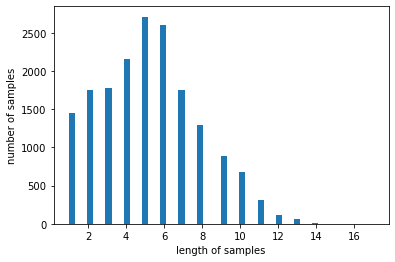

In [8]:
print('리뷰의 최대 길이 :',max(len(l) for l in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
from tensorflow.keras.preprocessing import sequence

def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' %(max_len, (count / len(nested_list))*100))

In [10]:
max_len =17
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 17 이하인 샘플의 비율: 100.0


##### padding 작업 (모든 샘플 길이를 17로 맞추기)

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 모든 샘플의 길이를 17로 맞추기
x_train = pad_sequences(x_train, maxlen = max_len)
x_validation = pad_sequences(x_validation, maxlen = max_len)

In [12]:
print(x_train)
print("-------- padding 후 ----------")
print(x_train.shape)
#print(y_validation.shape)

[[  0   0   0 ...  25  97  52]
 [  0   0   0 ...  63  11 111]
 [  0   0   0 ...  12   9 205]
 ...
 [  0   0   0 ...   0 436  89]
 [  0   0   0 ...   0   0  36]
 [  0   0   0 ...   0   0  27]]
-------- padding 후 ----------
(17555, 17)


##### 인코딩 (ex.[0,0,1,0,0], [0,1,0,0,0])

In [13]:
from tensorflow.keras.utils import to_categorical

x_train_encode = to_categorical(x_train, num_classes = 6033)  # num_classes = 6033 꼭 적기
x_validation_encode = to_categorical(x_validation, num_classes = 6033)

In [14]:
print("train_encode shape :", x_train_encode.shape)
#print(y_train.shape)
print("validation_encode shape :",x_validation_encode.shape)

train_encode shape : (17555, 17, 6033)
validation_encode shape : (4389, 17, 6033)


##### lstm 적용하기

In [15]:
# LSTM 모델 만들기
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
model = Sequential()

model.add(LSTM(32,input_shape = (17, 6033)))
model.add(Dense(1,activation = 'sigmoid'))

model.add(Dense(1, input_dim = 8, activation ='relu'))
model.add(LSTM(128))


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 32)                776448    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 776,483
Trainable params: 776,483
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 학습

#model.compile(optimizer = 'sgd', loss = 'binary_crossentropy',metrics = ['accuracy'])  
#model.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])  
model.compile(optimizer= 'rmsprop', loss = 'binary_crossentropy',metrics = ['accuracy'])  

hist = model.fit(x_train_encode, y_train, epochs = 5, batch_size = 50, validation_data = (x_validation_encode,y_validation))

Epoch 1/5
352/352 [==============================] - 99s 251ms/step - loss: 9.2611 - accuracy: 0.3996 - val_loss: 9.2149 - val_accuracy: 0.4026
Epoch 2/5
352/352 [==============================] - 79s 224ms/step - loss: 9.2611 - accuracy: 0.3996 - val_loss: 9.2149 - val_accuracy: 0.4026
Epoch 3/5
352/352 [==============================] - 77s 220ms/step - loss: 9.2611 - accuracy: 0.3996 - val_loss: 9.2149 - val_accuracy: 0.4026
Epoch 4/5
352/352 [==============================] - 75s 214ms/step - loss: 9.2611 - accuracy: 0.3996 - val_loss: 9.2149 - val_accuracy: 0.4026
Epoch 5/5
352/352 [==============================] - 87s 247ms/step - loss: 9.2611 - accuracy: 0.3996 - val_loss: 9.2149 - val_accuracy: 0.4026


In [19]:
# 모델 평가
model.evaluate(x = x_validation_encode, y = y_validation)

# 정확도 약 59.74% (높진 않다.)

138/138 [==============================] - 13s 48ms/step - loss: 0.6712 - accuracy: 0.5974


[0.6711772680282593, 0.5974025726318359]

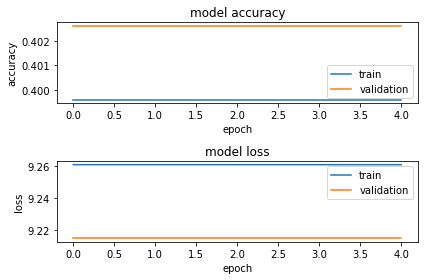

In [28]:
import matplotlib.pyplot as plt

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.tight_layout()

### test data

In [29]:
x_test

19360                              유가
11462                             인플레
9411     파이오링크 경신 주가 상승 단기간 골든 크로스 형성
14194                        하락 출발 약세
10737               서비스업 강세 가운데 상승 흐름
                     ...             
17728                           주요 지표
25826                              자금
1203              매수 우위 매도 강세 방송 서비스업
12549      이상 상승 상승 추세 조정 단기 중기 이평 배열
4706                   거래소 상승 진원 생명과학
Name: nouns, Length: 5486, dtype: object

In [30]:
x_test.shape

(5486,)

In [31]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = sequence.pad_sequences(x_test,maxlen = max_len)
x_test_encode = to_categorical(x_test_seq,  num_classes = 6033)

In [32]:
predicted_value = model.predict(x_test_encode)
print(predicted_value)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [33]:
# 예측
predicted_classes = np.zeros(len(predicted_value))
for i, score in enumerate(predicted_value):
    predicted_classes[i] = 1 if score > 0.5 else 0

print(predicted_classes)

[0. 0. 0. ... 0. 0. 0.]


In [34]:
# list를 데이터프레임으로 변경~
pd.DataFrame(predicted_classes).tail(55)

,0
5431,0.0
5432,0.0
5433,0.0
5434,0.0
5435,0.0
5436,0.0
5437,0.0
5438,0.0
5439,0.0
5440,0.0


### 모델 분류 개선

In [58]:
# 비율 확인
result["Price"].value_counts()

1    16487
0    10943
Name: Price, dtype: int64

In [59]:
# 1:1 비율로 샘플링 수행
up_random = result[result["Price"] == 1].sample(8000, random_state = 30).index.tolist()
down_random = result[result["Price"] == 0].sample(8000, random_state = 30).index.tolist()

In [60]:
# 랜덤데이터로 데이터 셋 나누기
random_idx = up_random + down_random  # 주가 상승 + 하락 합친 것
sample_x = x[random_idx]
y = result["Price"][random_idx]
print(sample_x)  # 17550? 정도였는데 16000으로 맞춤
print(y)
print("----------- 비율 동일 -------------")
y.value_counts() # 이제 동일함

4711                     조기 상환 가능성 모집
3104                  외국인 기관 매수 상승 출발
13368        디케 이락 이상 상승 전일 외국인 대량 매수
20712    바이든 선시 무역 분쟁 완화 트럼프 선시 갈등 격화
14130                  보합 매도 강세 의료 정밀
                     ...             
7471      결산 시즌 상장폐지 주의보 감사 의견 비적정 속출
22711                              과열
28106             실적 대치 주가 삼성 전자 미스터리
9763                니드 이상 상승 기관 연속 매수
26239                    공매도 융단 폭격 급락
Name: nouns, Length: 16000, dtype: object
4711     1
3104     1
13368    1
20712    1
14130    1
        ..
7471     0
22711    0
28106    0
9763     0
26239    0
Name: Price, Length: 16000, dtype: int64
----------- 비율 동일 -------------


1    8000
0    8000
Name: Price, dtype: int64

In [61]:
x_train, x_test, y_train, y_test = train_test_split(sample_x, y, test_size = 0.2, random_state = 13)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

In [62]:
print(x_train.shape)
print(x_validation.shape)

(10240,)
(2560,)


In [63]:
# 토큰나이저
from tensorflow.keras.preprocessing.text import Tokenizer

# str => int로 바꾸기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

print(tokenizer.word_index)
a = len(tokenizer.word_index)
print(a)  # 4790

{'상승': 1, '이상': 2, '매수': 3, '이평': 4, '배열': 5, '단기': 6, '외국인': 7, '주가': 8, '중기': 9, '기관': 10, '강세': 11, '매도': 12, '상승세': 13, '하락': 14, '대량': 15, '경신': 16, '우위': 17, '전일': 18, '연속': 19, '출발': 20, '코로나': 21, '반등': 22, '전자': 23, '삼성': 24, '골든': 25, '크로스': 26, '단기간': 27, '형성': 28, '거래소': 29, '흐름': 30, '상회': 31, '구간': 32, '실적': 33, '개인': 34, '오른': 35, '회복': 36, '유가': 37, '바이오': 38, '거래': 39, '이익': 40, '지수': 41, '영업': 42, '급등': 43, '매출': 44, '급락': 45, '약세': 46, '보합': 47, '상한': 48, '유지': 49, '가운데': 50, '최고': 51, '최근': 52, '시도': 53, '달러': 54, '지속': 55, '전환': 56, '반도체': 57, '외인': 58, '도달': 59, '금리': 60, '선물': 61, '목표': 62, '사상': 63, '제약': 64, '동반': 65, '국내': 66, '의료': 67, '서비스업': 68, '정밀': 69, '주목': 70, '자금': 71, '환율': 72, '홀딩스': 73, '우려': 74, '카카오': 75, '화학': 76, '옵션': 77, '붕괴': 78, '전기': 79, '종가': 80, '기준': 81, '금융': 82, '현대차': 83, '올해': 84, '증가': 85, '테크': 86, '대감': 87, '확산': 88, '팔자': 89, '공매도': 90, '현대': 91, '폭락': 92, '현황': 93, '주요': 94, '셀트리온': 95, '지표': 96, '초반': 97, '이틀': 98, '동학': 99, '

In [64]:
x_train = tokenizer.texts_to_sequences(x_train)
x_validation = tokenizer.texts_to_sequences(x_validation)

리뷰의 최대 길이 : 17
리뷰의 평균 길이 : 5.23134765625


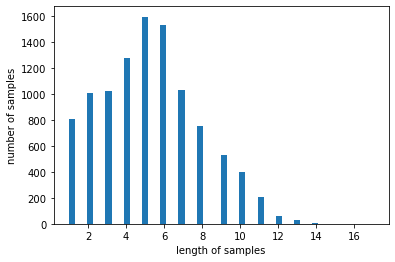

In [65]:
print('리뷰의 최대 길이 :',max(len(l) for l in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [66]:
max_len = 17
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 17 이하인 샘플의 비율: 100.0


In [67]:
# 패딩 작업
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 모든 샘플의 길이를 17로 맞추기
x_train = pad_sequences(x_train, maxlen = max_len)
x_validation = pad_sequences(x_validation, maxlen = max_len)

In [68]:
print(x_train)
print("-------- padding 후 ----------")
print(x_train.shape)
#print(y_validation.shape)

[[   0    0    0 ...    0    0   48]
 [   0    0    0 ... 2701 1462 1915]
 [   0    0    0 ...    0   41   77]
 ...
 [   0    0    0 ...   23   38  764]
 [   0    0    0 ...   10   19    3]
 [   0    0    0 ...   12   11  338]]
-------- padding 후 ----------
(10240, 17)


In [46]:
# 인코딩
from tensorflow.keras.utils import to_categorical

x_train_encode = to_categorical(x_train, num_classes = 4791)  # num_classes = 4791 꼭 적기
x_validation_encode = to_categorical(x_validation, num_classes = 4791)

In [47]:
print("train_encode shape :", x_train_encode.shape)
#print(y_train.shape)
print("validation_encode shape :",x_validation_encode.shape)

train_encode shape : (10240, 17, 4791)
validation_encode shape : (2560, 17, 4791)


In [48]:
# LSTM 모델 만들기
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [56]:
model = Sequential()

model.add(LSTM(128,input_shape = (17, 4791)))
model.add(Dense(1,activation = 'sigmoid'))

#model.add(Dense(1, input_dim = 8, activation ='relu'))


model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 128)               2519040   
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 2,519,169
Trainable params: 2,519,169
Non-trainable params: 0
_________________________________________________________________


In [57]:
# 모델 학습

#model.compile(optimizer = 'sgd', loss = 'binary_crossentropy',metrics = ['accuracy'])  
model.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])  
#model.compile(optimizer= 'rmsprop', loss = 'binary_crossentropy',metrics = ['accuracy'])  

hist = model.fit(x_train_encode, y_train, epochs = 10, batch_size = 50, validation_data = (x_validation_encode,y_validation))

Epoch 1/15
205/205 [==============================] - 106s 468ms/step - loss: 0.6737 - accuracy: 0.5740 - val_loss: 0.6538 - val_accuracy: 0.5992
Epoch 2/15
205/205 [==============================] - 81s 394ms/step - loss: 0.6010 - accuracy: 0.6712 - val_loss: 0.6583 - val_accuracy: 0.5902
Epoch 3/15
205/205 [==============================] - 80s 391ms/step - loss: 0.5234 - accuracy: 0.7293 - val_loss: 0.6952 - val_accuracy: 0.5895
Epoch 4/15
205/205 [==============================] - 77s 378ms/step - loss: 0.4618 - accuracy: 0.7647 - val_loss: 0.7709 - val_accuracy: 0.5883
Epoch 5/15
205/205 [==============================] - 86s 422ms/step - loss: 0.4204 - accuracy: 0.7901 - val_loss: 0.8652 - val_accuracy: 0.5824
Epoch 6/15
205/205 [==============================] - 79s 387ms/step - loss: 0.3933 - accuracy: 0.8013 - val_loss: 0.9675 - val_accuracy: 0.5789
Epoch 7/15
205/205 [==============================] - 102s 496ms/step - loss: 0.3710 - accuracy: 0.8111 - val_loss: 0.9985 - val_

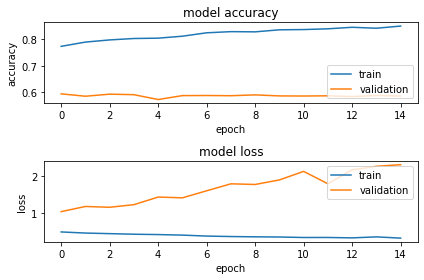

In [55]:
import matplotlib.pyplot as plt

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.tight_layout()

### test data

In [104]:
x_test

27970                         사상 최고 경신
14898    경동제약 경신 외국인 기관 각각 연속 매수 연속 매도
17713               개발 업체 영림 소프트 내달 입성
3602        솔트 웍스 이상 상승 매출 영업 이익 흑자 전환
18585                               회복
                     ...              
26712                           원자재 금보
4938                이엠 경신 전일 외국인 대량 매수
23709          삼성 전자 특별 배당 작년 주요 장사 배당
3143             코윈 테크 경신 전일 외국인 대량 매수
11302                  매수 우위 매수 강세 인터넷
Name: nouns, Length: 3200, dtype: object

In [105]:
x_test.shape

(3200,)

In [106]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = sequence.pad_sequences(x_test,maxlen = max_len)
x_test_encode = to_categorical(x_test_seq,  num_classes = 4791)

In [107]:
predicted_value = model.predict(x_test_encode)
print(predicted_value)

[[0.5011156]
 [0.504156 ]
 [0.5016537]
 ...
 [0.5028214]
 [0.5035978]
 [0.5009158]]


In [108]:
# 예측
predicted_classes = np.zeros(len(predicted_value))
for i, score in enumerate(predicted_value):
    predicted_classes[i] = 1 if score > 0.5 else 0

print(predicted_classes)

[1. 1. 1. ... 1. 1. 1.]


In [111]:
pd.DataFrame(predicted_classes).tail(55)

,0
3145,0.0
3146,0.0
3147,1.0
3148,1.0
3149,0.0
3150,1.0
3151,1.0
3152,0.0
3153,0.0
3154,0.0


In [102]:
print(x_train.shape)
print(x_validation.shape)

(64,)
(16,)


In [108]:
# 예측
import numpy as np

#for i in range(len(x_test)):
 #   x_test[i] = [w for w in x_test[i]]

x_test_seq = sequence.pad_sequences(x_test,maxlen = maxlen)
x_test_encode = to_categorical(x_test_seq)

predicted_value = model.predict(x_test_encode)
print(predicted_value)

predicted_classes = np.zeros(len(predicted_value))
for i, score in enumerate(predicted_value):
    predicted_classes[i] = 1 if score > 0.5 else 0

print(predicted_classes)

NameError: name 'maxlen' is not defined

In [109]:
correct = 0
incorrect = 0
for i in range(len(predicted_classes)):
    if predicted_classes[i]== y_test[i]:
        correct +=1
    else:
        incorrect +=1

print("A correct answer rate:", correct/(correct + incorrect)*100, '%')

NameError: name 'predicted_classes' is not defined

In [21]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(6585, embedding_dim))  # 단어 갯수 + 1
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [107]:
# 모델 학습
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy',metrics = ['accuracy'])
#model.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

hist = model.fit(x_train, y_train, epochs = 10, batch_size = 100, validation_data = (x_validation,y_validation))

Epoch 1/10


ValueError: in user code:

    C:\Users\young\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\young\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\young\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\young\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\young\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\young\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\young\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\young\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\young\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:215 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 17)


In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 15, callbacks = [es, mc], batch_size = 256, validation_split = 0.2)

In [118]:
# 모델 평가
model.evaluate(x = x_validation, y = y_validation)

# 정확도 약 64% (높진 않다.)

172/172 [==============================] - 7s 11ms/step - loss: 0.6622 - accuracy: 0.6052


[0.6622099876403809, 0.6052104234695435]

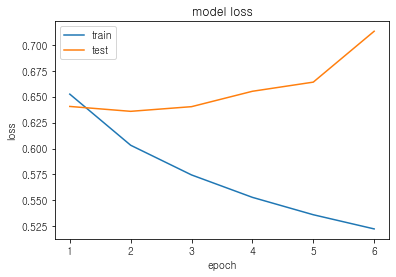

In [119]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
# 전체적으로는 검증 데이터의 손실이 줄어드는 경향이 있지만 뒤로 갈수록 점차 검증 데이터의 손실이 증가하려고 하는 경향이 보입니다. 
# 이는 과적합의 신호일 수 있습니다.